In [1]:
#IMPORTS
import numpy as np
from DataLoad.TripletGen import DataLoad, triplet_gen
from Visuals.TSNE import scatter
from TripletSiamese.TripletNet import EmbeddingNet
from TripletSiamese.TripletLoss import triplet_loss

from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop, Adam,SGD
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Input, concatenate, Lambda
from tensorflow.keras import backend as K
import tensorflow as tf
from sklearn.manifold import TSNE

In [3]:
PATH = r'INSERT DIRECTORY OF THE DATASET'

x, y ,dataset= DataLoad(PATH)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

### Dimensions of the image inputs
dim1 = x_train.shape[1]
dim2 = x_train.shape[2]
dim3 = x_train.shape[3]

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


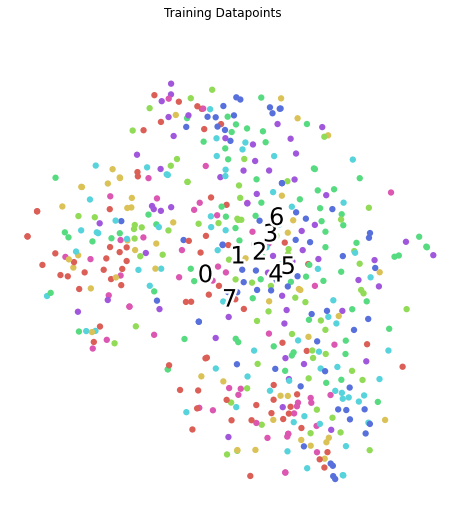

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


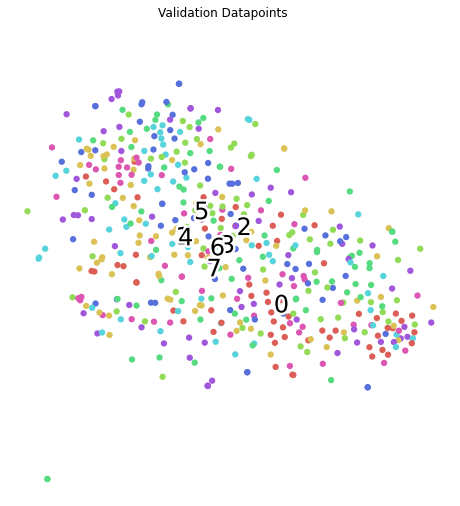

In [4]:
#Plot the datapoints before training

x_train_flat = x_train.reshape(-1,dim1*dim2*dim3)
x_test_flat = x_test.reshape(-1,dim1*dim2*dim3)

tsne = TSNE()
train_tsne_embeds = tsne.fit_transform(x_train_flat[:512])
scatter(train_tsne_embeds, y_train[:512],'Training Datapoints')

eval_tsne_embeds = tsne.fit_transform(x_test_flat[:512])
scatter(eval_tsne_embeds, y_test[:512], 'Validation Datapoints')

In [5]:
X_train, X_test = triplet_gen(x_train, y_train, num_pairs =50 , test_size=0.3)

In [6]:
adam_optim = RMSprop(lr=0.01, decay=2e-2)

In [7]:
anchor_input = Input((dim1,dim2,dim3), name='anchor')
positive_input = Input((dim1,dim2,dim3), name='positive')
negative_input = Input((dim1,dim2,dim3), name='negative')

# Shared embedding layer for positive and negative items
Shared_Weights = EmbeddingNet([dim1,dim2,dim3])

# Encode the input images
encoded_anchor = Shared_Weights(anchor_input)
encoded_positive = Shared_Weights(positive_input)
encoded_negative = Shared_Weights(negative_input)

# L1_layer = Lambda(lambda tensor:K.abs(tensor[0] - tensor[1]))
# L2_layer = Lambda(lambda tensor:K.abs(tensor[0] - tensor[1]))

# L1_distance = L1_layer([encoded_anchor, encoded_positive])
# L2_distance = L2_layer([encoded_anchor,encoded_negative])

# merged_vector = ([L1_distance,L2_distance])
# model = Model(inputs=[anchor_input,positive_input, negative_input],outputs=merged_vector)
# model.compile(loss=triplet_loss, optimizer=adam_optim)

merged_vector = concatenate([encoded_anchor, encoded_positive, encoded_negative], axis=-1, name='triplet_layer')

model = Model(inputs=[anchor_input,positive_input, negative_input], outputs=merged_vector)
model.compile(loss=triplet_loss, optimizer=adam_optim)

model.summary()

y_pred.shape =  Tensor("triplet_layer/Identity:0", shape=(None, 384), dtype=float32)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
anchor (InputLayer)             [(None, 60, 60, 3)]  0                                            
__________________________________________________________________________________________________
positive (InputLayer)           [(None, 60, 60, 3)]  0                                            
__________________________________________________________________________________________________
negative (InputLayer)           [(None, 60, 60, 3)]  0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 128)          7111066     anchor[0][0]                     
         

In [ ]:
shapes = (-1,dim1, dim2, dim3)
Anchor = X_train[:,0,:].reshape(shapes)
Positive = X_train[:,1,:].reshape(shapes)
Negative = X_train[:,2,:].reshape(shapes)
Anchor_test = X_test[:,0,:].reshape(shapes)
Positive_test = X_test[:,1,:].reshape(shapes)
Negative_test = X_test[:,2,:].reshape(shapes)

label_count = len(np.unique(y_train))
# Generate labels based on the number of classes
Y_train_gen = np.empty((Anchor.shape[0], label_count))
Y_test_gen = np.empty((Anchor_test.shape[0], label_count))

triplet_model = model.fit([Anchor,Positive,Negative],y=Y_train_gen,
          validation_data=([Anchor_test,Positive_test,Negative_test],Y_test_gen), 
          batch_size=100, epochs=200)


In [ ]:
### Fit the trained embeddings in the TSNE 
tsne = TSNE()
X_train_trm = triplet_model.predict(x_train[:512].reshape(-1,60,60,3))
X_test_trm = triplet_model.predict(x_test[:512].reshape(-1,60,60,3))
train_tsne_embeds = tsne.fit_transform(X_train_trm)
eval_tsne_embeds = tsne.fit_transform(X_test_trm)

In [ ]:
### Plot the trained embeddings 
scatter(train_tsne_embeds, y_train[:512], "Data After Triplet-Siamese Network is trained")